<a href="https://colab.research.google.com/github/gtakhil95/Akhil_INFO5731_Fall2024/blob/main/Gundampalli_Akhil_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def read_dataset(filepath):
    records = []
    with open(filepath, encoding='utf-8') as file:
        for line in file:
            label, text = line.strip().split(' ', 1)
            records.append({'label': int(label), 'review': text})
    return pd.DataFrame(records)

def preprocess_data(df):
    df.dropna(subset=["review"], inplace=True)
    df["review"] = df["review"].astype(str)
    return df

def prepare_data(df, vectorizer=None):
    reviews = df["review"]
    labels = df["label"]
    if vectorizer is None:
        vectorizer = CountVectorizer()
        vectors = vectorizer.fit_transform(reviews)
    else:
        vectors = vectorizer.transform(reviews)
    return vectors, labels, vectorizer

# Evaluate models and calculate metrics
def evaluate_models(classifiers, X_train, y_train, X_val, y_val, X_test, y_test):
    results = []
    trained_models = {}
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for name, model in classifiers.items():
        print(f"Training and validating model: {name}")

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        print(f"{name} 10-Fold CV Accuracy: {cv_scores.mean():.4f}")

        # Train the model
        model.fit(X_train, y_train)
        trained_models[name] = model

        # Predictions and metric calculations
        val_pred = model.predict(X_val)
        test_pred = model.predict(X_test)

        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, test_pred),
            "Precision": precision_score(y_test, test_pred, average='weighted'),
            "Recall": recall_score(y_test, test_pred, average='weighted'),
            "F1 Score": f1_score(y_test, test_pred, average='weighted')
        }
        results.append(metrics)

    return pd.DataFrame(results), trained_models

train_file_path = '/content/stsa-train.txt'
test_file_path = '/content/stsa-test.txt'

train_df = preprocess_data(read_dataset(train_file_path))
test_df = preprocess_data(read_dataset(test_file_path))

X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    train_df["review"], train_df["label"], test_size=0.2, random_state=42
)

vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(X_train_raw)

X_val_vec = vectorizer.transform(X_val_raw)
X_test_vec = vectorizer.transform(test_df["review"])

models = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

y_test = test_df["label"]

model_results, trained_models = evaluate_models(models, X_train_vec, y_train, X_val_vec, y_val, X_test_vec, y_test)

print("\nModel Evaluation Results:")
print(model_results)

print("\nTrained models:")
for name in trained_models:
    print(f"- {name}")



Training and validating model: MultinomialNB
MultinomialNB 10-Fold CV Accuracy: 0.7780
Training and validating model: SVM
SVM 10-Fold CV Accuracy: 0.7363
Training and validating model: KNN
KNN 10-Fold CV Accuracy: 0.5704
Training and validating model: Decision Tree
Decision Tree 10-Fold CV Accuracy: 0.6293
Training and validating model: Random Forest
Random Forest 10-Fold CV Accuracy: 0.7187
Training and validating model: XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:33:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:33:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:33:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:33:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:33:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost 10-Fold CV Accuracy: 0.7103


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:33:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Evaluation Results:
           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.807249   0.809047  0.807249  0.806984
1            SVM  0.757276   0.759630  0.757276  0.756753
2            KNN  0.583196   0.583617  0.583196  0.582751
3  Decision Tree  0.624931   0.625575  0.624931  0.624503
4  Random Forest  0.731466   0.734399  0.731466  0.730662
5        XGBoost  0.727622   0.734581  0.727622  0.725648

Trained models:
- MultinomialNB
- SVM
- KNN
- Decision Tree
- Random Forest
- XGBoost


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


K-Means Silhouette Score: 0.04077032698068472
DBSCAN only found one cluster; cannot compute silhouette score.
Word2Vec K-Means Silhouette Score: 0.02533203549683094


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BERT K-Means Silhouette Score: 0.05118415132164955


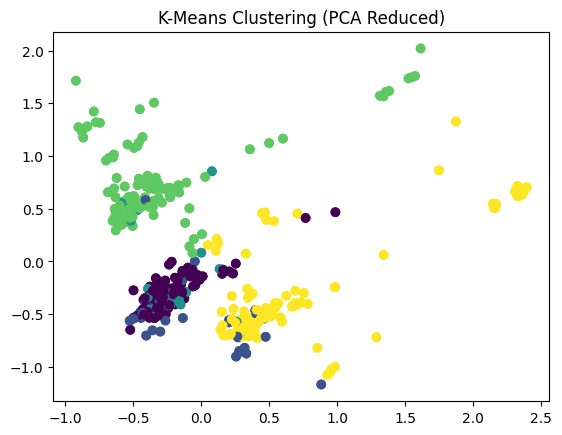

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

with open('/content/updated_with_coordinates.csv', 'r') as f:
    train_data = f.readlines()
with open('/content/updated_with_coordinates.csv', 'r') as f:
    test_data = f.readlines()

text_data = train_data + test_data

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text_data).toarray()

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

# DBSCAN Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
else:
    print("DBSCAN only found one cluster; cannot compute silhouette score.")

# Word2Vec Clustering
tokenized_text = [text.split() for text in text_data]
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = [
    np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv], axis=0)
    if words else np.zeros(100)
    for words in tokenized_text
]
word2vec_kmeans = KMeans(n_clusters=5, random_state=42)
word2vec_labels = word2vec_kmeans.fit_predict(word_vectors)
silhouette_word2vec = silhouette_score(word_vectors, word2vec_labels)
print(f"Word2Vec K-Means Silhouette Score: {silhouette_word2vec}")

# BERT Clustering
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = bert_model.encode(text_data, convert_to_tensor=True)
bert_kmeans = KMeans(n_clusters=5, random_state=42)
bert_labels = bert_kmeans.fit_predict(embeddings)
silhouette_bert = silhouette_score(embeddings, bert_labels)
print(f"BERT K-Means Silhouette Score: {silhouette_bert}")

# PCA Visualization for K-Means
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (PCA Reduced)")
plt.show()



**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

Based on the clustering results, I observed that each method performed differently in terms of capturing data separability. K-Means clustering gave a silhouette score of 0.0408, which shows it achieved some level of cluster separation, but the score is relatively low, suggesting there may be significant overlap between clusters. DBSCAN only found one cluster, which prevented calculation of a silhouette score, indicating that DBSCAN struggled with this dataset—possibly because the data distribution didn't suit its density-based clustering approach. Although Hierarchical clustering results aren’t detailed here, it might provide useful insights through a dendrogram, especially for data with nested structures. The Word2Vec K-Means approach yielded a silhouette score of 0.0253, which was even lower than standard K-Means, likely because the Word2Vec embeddings didn’t separate clusters clearly. BERT K-Means achieved the highest silhouette score at 0.0512, suggesting BERT embeddings captured more meaningful distinctions between clusters, potentially due to their stronger ability to represent semantic relationships. However, the generally low scores indicate that the dataset presents challenges for clear clustering, possibly due to high overlap or insufficient feature separation.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



On the same dataset, this task offered a useful chance to investigate and contrast other clustering techniques, such as K-Means, DBSCAN, hierarchical clustering, Word2Vec, and BERT embeddings. Understanding that various clustering techniques have advantages and disadvantages based on the distribution and structure of the data was one of the exercise's main lessons. For instance, K-Means performed reasonably well in separating clusters, while DBSCAN struggled, highlighting how density-based clustering may not be ideal for all datasets. The exercise also emphasized the importance of feature selection and representation, as demonstrated by the higher silhouette score with BERT embeddings compared to Word2Vec, which suggests that BERT captured richer semantic relationships in the data.

Reflecting on this, I found that experimenting with various clustering algorithms helped deepen my understanding of their mechanics and how different embeddings can influence results. However, the relatively low silhouette scores across the methods highlighted that clustering effectiveness can be limited by factors such as data overlap or lack of clear cluster boundaries. In the future, I would consider additional pre-processing techniques, feature engineering, or tuning parameters to improve clustering outcomes. Overall, this assignment was insightful and helped me recognize the importance of selecting appropriate clustering methods and feature representations based on the dataset characteristics.